In [111]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [152]:
!pip install textblob

     -------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob

In [2]:
df1=pd.read_csv('Combined_News_DJIA.csv')

In [3]:
#df1.head()
df1.shape

(1989, 27)

In [4]:
df2=pd.read_csv('Dow Jones Industrial Average Historical Data.csv')

In [5]:
#df2.head()
df2.shape

(1989, 7)

In [6]:
df3 = pd.DataFrame(columns=df2.columns, index=range(0, 1989))
for i in range(0,1989):
    df3.iloc[i]=df2.iloc[1988-i]

In [7]:
data1=pd.concat([df1,df3],axis=1)
data=data1.copy()

In [8]:
columns=['Price','Open','High','Low']
for col in columns:
    data[col]=data[col].str.replace(',','')
    data[col]=data[col].astype(float)
data['Vol.']=data['Vol.'].str.replace('M','').astype(float)
data['Vol.']=data['Vol.']*1000000
data.drop('Label',axis=1,inplace=True)

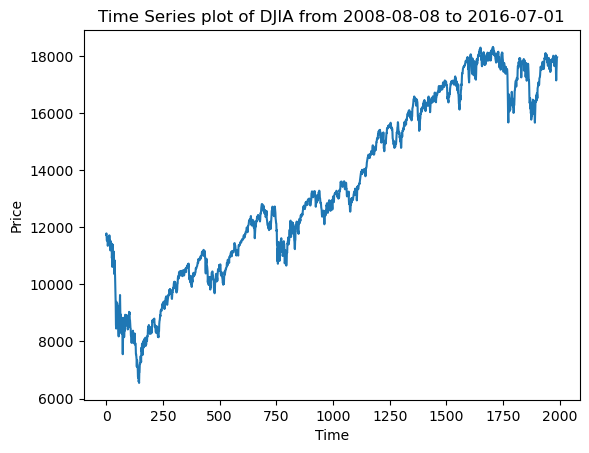

In [9]:
plt.plot(data['Price'])
plt.title('Time Series plot of DJIA from 2008-08-08 to 2016-07-01')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [10]:
data.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top23,Top24,Top25,Date,Price,Open,High,Low,Vol.,Change %
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",08-08-2008,11734.32,11432.09,11759.96,11388.04,212830000.0,2.65%
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11-08-2008,11782.35,11729.67,11867.11,11675.53,183190000.0,0.41%
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",12-08-2008,11642.47,11781.70,11782.35,11601.52,173590000.0,-1.19%
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,13-08-2008,11532.96,11632.81,11633.78,11453.34,182550000.0,-0.94%
4,2008-08-14,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",b'Russia exaggerating South Ossetian death tol...,...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,14-08-2008,11615.93,11532.07,11718.28,11450.89,159790000.0,0.72%


In [11]:
news_col=['Top{}'.format(i) for i in range(1,26)]

In [12]:
news_col

['Top1',
 'Top2',
 'Top3',
 'Top4',
 'Top5',
 'Top6',
 'Top7',
 'Top8',
 'Top9',
 'Top10',
 'Top11',
 'Top12',
 'Top13',
 'Top14',
 'Top15',
 'Top16',
 'Top17',
 'Top18',
 'Top19',
 'Top20',
 'Top21',
 'Top22',
 'Top23',
 'Top24',
 'Top25']

In [13]:
data[news_col]

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...","b""92% of CNN readers: Russia's actions in Geor...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksande

In [14]:
data[news_col] = data[news_col].fillna('').astype(str)

In [15]:
data['combined_news'] = data[news_col].agg(' '.join, axis=1)
data.drop(news_col,axis=1,inplace=True)

In [18]:
data.drop("Date",axis=1,inplace=True)

In [106]:
data_new=data.copy()

In [107]:
data_new

,Price,Open,High,Low,Vol.,Change %,combined_news
0,11734.32,11432.09,11759.96,11388.04,212830000.0,2.65%,"b""Georgia 'downs two Russian warplanes' as cou..."
1,11782.35,11729.67,11867.11,11675.53,183190000.0,0.41%,b'Why wont America and Nato help us? If they w...
2,11642.47,11781.70,11782.35,11601.52,173590000.0,-1.19%,b'Remember that adorable 9-year-old who sang a...
3,11532.96,11632.81,11633.78,11453.34,182550000.0,-0.94%,b' U.S. refuses Israel weapons to attack Iran:...
4,11615.93,11532.07,11718.28,11450.89,159790000.0,0.72%,b'All the experts admit that we should legalis...
...,...,...,...,...,...,...,...
1984,17140.24,17355.21,17355.21,17063.08,138740000.0,-1.50%,Barclays and RBS shares suspended from trading...
1985,17409.72,17190.51,17409.72,17190.51,112190000.0,1.57%,"2,500 Scientists To Australia: If You Want To ..."
1986,17694.68,17456.02,17704.51,17456.02,106380000.0,1.64%,Explosion At Airport In Istanbul Yemeni former...
1987,17929.99,17712.76,17930.61,17711.80,133030000.0,1.33%,Jamaica proposes marijuana dispensers for tour...


In [108]:
for i in range(0,1989):
    data_new['combined_news'][i] =re.sub('[^a-zA-Z0-9 \n\.]', ' ', data_new['combined_news'][i]).replace('b','')

In [109]:
data_new

,Price,Open,High,Low,Vol.,Change %,combined_news
0,11734.32,11432.09,11759.96,11388.04,212830000.0,2.65%,Georgia downs two Russian warplanes as coun...
1,11782.35,11729.67,11867.11,11675.53,183190000.0,0.41%,Why wont America and Nato help us If they wo...
2,11642.47,11781.70,11782.35,11601.52,173590000.0,-1.19%,Rememer that adorale 9 year old who sang at t...
3,11532.96,11632.81,11633.78,11453.34,182550000.0,-0.94%,U.S. refuses Israel weapons to attack Iran ...
4,11615.93,11532.07,11718.28,11450.89,159790000.0,0.72%,All the experts admit that we should legalise...
...,...,...,...,...,...,...,...
1984,17140.24,17355.21,17355.21,17063.08,138740000.0,-1.50%,Barclays and RBS shares suspended from trading...
1985,17409.72,17190.51,17409.72,17190.51,112190000.0,1.57%,2 500 Scientists To Australia If You Want To ...
1986,17694.68,17456.02,17704.51,17456.02,106380000.0,1.64%,Explosion At Airport In Istanul Yemeni former ...
1987,17929.99,17712.76,17930.61,17711.80,133030000.0,1.33%,Jamaica proposes marijuana dispensers for tour...


In [112]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj= SentimentIntensityAnalyzer()

In [125]:
neg=[]
neu=[]
pos=[]
compound=[]

for i in range(0,1989):
    sentiment_scores = sid_obj.polarity_scores(data_new['combined_news'][i])
    neg.append(sentiment_scores['neg'])
    neu.append(sentiment_scores['neu'])
    pos.append(sentiment_scores['pos'])
    compound.append(sentiment_scores['compound'])

In [129]:
data_new['negative']=neg
data_new['neutral']=neu
data_new['positive']=pos
data_new['compound']=compound

In [130]:
data_new

,Price,Open,High,Low,Vol.,Change %,combined_news,negative,neutral,positive,compound
0,11734.32,11432.09,11759.96,11388.04,212830000.0,2.65%,Georgia downs two Russian warplanes as coun...,0.214,0.752,0.033,-0.9977
1,11782.35,11729.67,11867.11,11675.53,183190000.0,0.41%,Why wont America and Nato help us If they wo...,0.172,0.746,0.082,-0.9801
2,11642.47,11781.70,11782.35,11601.52,173590000.0,-1.19%,Rememer that adorale 9 year old who sang at t...,0.166,0.780,0.053,-0.9937
3,11532.96,11632.81,11633.78,11453.34,182550000.0,-0.94%,U.S. refuses Israel weapons to attack Iran ...,0.149,0.789,0.061,-0.9843
4,11615.93,11532.07,11718.28,11450.89,159790000.0,0.72%,All the experts admit that we should legalise...,0.173,0.723,0.104,-0.9801
...,...,...,...,...,...,...,...,...,...,...,...
1984,17140.24,17355.21,17355.21,17063.08,138740000.0,-1.50%,Barclays and RBS shares suspended from trading...,0.121,0.782,0.096,-0.8591
1985,17409.72,17190.51,17409.72,17190.51,112190000.0,1.57%,2 500 Scientists To Australia If You Want To ...,0.124,0.774,0.102,-0.9403
1986,17694.68,17456.02,17704.51,17456.02,106380000.0,1.64%,Explosion At Airport In Istanul Yemeni former ...,0.225,0.681,0.094,-0.9976
1987,17929.99,17712.76,17930.61,17711.80,133030000.0,1.33%,Jamaica proposes marijuana dispensers for tour...,0.183,0.761,0.056,-0.9971


In [147]:
data_with_vader=data_new.drop('combined_news',axis=1)

In [154]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Initialize columns for sentiment scores
data_new['sentiment_polarity'] = 0.0
data_new['sentiment_subjectivity'] = 0.0

# Apply sentiment analysis to each row
for i in range(len(data)):
    polarity, subjectivity = get_sentiment(data_new['combined_news'][i])
    data_new.at[i, 'sentiment_polarity'] = polarity
    data_new.at[i, 'sentiment_subjectivity'] = subjectivity



In [155]:
data_new

,Price,Open,High,Low,Vol.,Change %,combined_news,negative,neutral,positive,compound,sentiment_polarity,sentiment_subjectivity
0,11734.32,11432.09,11759.96,11388.04,212830000.0,2.65%,Georgia downs two Russian warplanes as coun...,0.214,0.752,0.033,-0.9977,-0.055870,0.273787
1,11782.35,11729.67,11867.11,11675.53,183190000.0,0.41%,Why wont America and Nato help us If they wo...,0.172,0.746,0.082,-0.9801,0.120954,0.340073
2,11642.47,11781.70,11782.35,11601.52,173590000.0,-1.19%,Rememer that adorale 9 year old who sang at t...,0.166,0.780,0.053,-0.9937,-0.029923,0.420418
3,11532.96,11632.81,11633.78,11453.34,182550000.0,-0.94%,U.S. refuses Israel weapons to attack Iran ...,0.149,0.789,0.061,-0.9843,-0.020781,0.384336
4,11615.93,11532.07,11718.28,11450.89,159790000.0,0.72%,All the experts admit that we should legalise...,0.173,0.723,0.104,-0.9801,0.051094,0.406349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,17140.24,17355.21,17355.21,17063.08,138740000.0,-1.50%,Barclays and RBS shares suspended from trading...,0.121,0.782,0.096,-0.8591,-0.010101,0.350233
1985,17409.72,17190.51,17409.72,17190.51,112190000.0,1.57%,2 500 Scientists To Australia If You Want To ...,0.124,0.774,0.102,-0.9403,0.044338,0.337093
1986,17694.68,17456.02,17704.51,17456.02,106380000.0,1.64%,Explosion At Airport In Istanul Yemeni former ...,0.225,0.681,0.094,-0.9976,0.066100,0.406693
1987,17929.99,17712.76,17930.61,17711.80,133030000.0,1.33%,Jamaica proposes marijuana dispensers for tour...,0.183,0.761,0.056,-0.9971,-0.005610,0.378517


In [159]:
data_new.to_csv('data_with_vader.csv')